In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

# model-1 随机森林

In [2]:
# 加载数据
file_path = 'E:\竞赛\服创赛-A08\data\A08.csv'  
data = pd.read_csv(file_path)

# 数据预处理
# 分离特征和目标变量
X = data.drop(columns=['RES'])
y = data['RES']

# 移除准常数特征
selector = VarianceThreshold(threshold=0.01)
selector.fit(X)
X = X.loc[:, selector.get_support()]

# 填充缺失值
X.fillna(0, inplace=True)

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 重采样 - 结合过采样和欠采样
# 欠采样多数类
n_minority = len(y_train[y_train == 1])
X_train_majority = X_train[y_train == 0]
y_train_majority = y_train[y_train == 0]
X_train_majority_downsampled, y_train_majority_downsampled = resample(X_train_majority, y_train_majority, 
                                                                      replace=False, 
                                                                      n_samples=n_minority, 
                                                                      random_state=42)

# 结合少数类和欠采样后的多数类
X_train_balanced = np.vstack((X_train_majority_downsampled, X_train[y_train == 1]))
y_train_balanced = np.hstack((y_train_majority_downsampled, y_train[y_train == 1]))

# 过采样少数类
X_train_minority = X_train[y_train == 1]
y_train_minority = y_train[y_train == 1]
X_train_minority_oversampled, y_train_minority_oversampled = resample(X_train_minority, y_train_minority, 
                                                                      replace=True, 
                                                                      n_samples=len(y_train_majority_downsampled), 
                                                                      random_state=42)

# 结合过采样的少数类和之前的数据
X_train_resampled = np.vstack((X_train_balanced, X_train_minority_oversampled))
y_train_resampled = np.hstack((y_train_balanced, y_train_minority_oversampled))

# 训练随机森林模型
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# 预测和评估
y_pred_rf = rf.predict(X_test)
report_rf = classification_report(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# 输出结果
print("分类报告:\n", report_rf)
print("准确度:", accuracy_rf)
print("混淆矩阵:\n", cm_rf)


分类报告:
               precision    recall  f1-score   support

           0       0.99      0.80      0.89      3048
           1       0.18      0.91      0.30       152

    accuracy                           0.80      3200
   macro avg       0.59      0.85      0.59      3200
weighted avg       0.96      0.80      0.86      3200

准确度: 0.803125
混淆矩阵:
 [[2432  616]
 [  14  138]]


# model-2 随机森林


In [3]:
# 删除指定的列
columns_to_drop = ['检查费自费金额_SUM', '贵重检查费金额_SUM', '手术费自费金额_SUM',
                  '治疗费自费金额_SUM','手术费发生金额_SUM','手术费申报金额_SUM','床位费发生金额_SUM','床位费申报金额_SUM',
                   '高价材料发生金额_SUM','成分输血申报金额_SUM','其它申报金额_SUM','起付线标准金额_MAX','最高限额以上金额_SUM',
                   '公务员医疗补助基金支付金额_SUM','残疾军人补助_SUM','城乡优抚补助_SUM','BZ_城乡优抚'
                  ]

# 待删除列:一天去两家医院的天数,中草药费发生金额_SUM 医用材料费自费金额_SUM 其它发生金额_SUM 医疗救助个人按比例负担金额_SUM
# 城乡救助补助金额_SUM 补助审批金额_SUM   医疗救助医院申请_SUM  民政救助补助_SUM  个人支付检查费用占比  个人支付治疗费用占比  BZ_民政救助
#   是否挂号 
data_dropped = data.drop(columns=columns_to_drop)

# 将处理后的数据集写入新的CSV文件
output_file_path = 'E:\\竞赛\\服创赛-A08\\data\\processed_A08-1.csv'
data_dropped.to_csv(output_file_path, index=False)

In [4]:
# 加载数据
file_path = 'E:\\竞赛\\服创赛-A08\\data\\processed_A08-1.csv' 
data = pd.read_csv(file_path)

data.columns


Index(['个人编码', '一天去两家医院的天数', '就诊的月数', '月就诊天数_MAX', '月就诊天数_AVG', '月就诊医院数_MAX',
       '月就诊医院数_AVG', '就诊次数_SUM', '月就诊次数_MAX', '月就诊次数_AVG', '月统筹金额_MAX',
       '月统筹金额_AVG', '月药品金额_MAX', '月药品金额_AVG', '医院_就诊天数_MAX', '医院_就诊天数_AVG',
       '医院_统筹金_MAX', '医院_统筹金_AVG', '医院_药品_MAX', '医院_药品_AVG', '医院编码_NN',
       '顺序号_NN', '交易时间DD_NN', '交易时间YYYY_NN', '交易时间YYYYMM_NN', '住院天数_SUM',
       '个人账户金额_SUM', '统筹支付金额_SUM', 'ALL_SUM', '可用账户报销金额_SUM', '药品费发生金额_SUM',
       '药品费自费金额_SUM', '药品费申报金额_SUM', '贵重药品发生金额_SUM', '中成药费发生金额_SUM',
       '中草药费发生金额_SUM', '检查费发生金额_SUM', '检查费申报金额_SUM', '治疗费发生金额_SUM',
       '治疗费申报金额_SUM', '医用材料发生金额_SUM', '医用材料费自费金额_SUM', '其它发生金额_SUM',
       '一次性医用材料申报金额_SUM', '起付标准以上自负比例金额_SUM', '医疗救助个人按比例负担金额_SUM',
       '基本统筹基金支付金额_SUM', '城乡救助补助金额_SUM', '基本个人账户支付_SUM', '非账户支付金额_SUM',
       '本次审批金额_SUM', '补助审批金额_SUM', '医疗救助医院申请_SUM', '民政救助补助_SUM', '出院诊断病种名称_NN',
       '出院诊断LENTH_MAX', '药品在总金额中的占比', '个人支付的药品占比', '检查总费用在总金额占比', '个人支付检查费用占比',
       '治疗费用在总金额占比', '个人支付治疗费用占比', 'BZ_民政救助', 

In [5]:
# 数据预处理
# 分离特征和目标变量
X = data.drop(columns=['RES'])
y = data['RES']

# 移除准常数特征
selector = VarianceThreshold(threshold=0.01)
selector.fit(X)
X = X.loc[:, selector.get_support()]

# 填充缺失值
X.fillna(0, inplace=True)

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 重采样 - 结合过采样和欠采样
# 欠采样多数类
n_minority = len(y_train[y_train == 1])
X_train_majority = X_train[y_train == 0]
y_train_majority = y_train[y_train == 0]
X_train_majority_downsampled, y_train_majority_downsampled = resample(X_train_majority, y_train_majority, 
                                                                      replace=False, 
                                                                      n_samples=n_minority, 
                                                                      random_state=42)

# 结合少数类和欠采样后的多数类
X_train_balanced = np.vstack((X_train_majority_downsampled, X_train[y_train == 1]))
y_train_balanced = np.hstack((y_train_majority_downsampled, y_train[y_train == 1]))

# 过采样少数类
X_train_minority = X_train[y_train == 1]
y_train_minority = y_train[y_train == 1]
X_train_minority_oversampled, y_train_minority_oversampled = resample(X_train_minority, y_train_minority, 
                                                                      replace=True, 
                                                                      n_samples=len(y_train_majority_downsampled), 
                                                                      random_state=42)

# 结合过采样的少数类和之前的数据
X_train_resampled = np.vstack((X_train_balanced, X_train_minority_oversampled))
y_train_resampled = np.hstack((y_train_balanced, y_train_minority_oversampled))

# 训练随机森林模型
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# 预测和评估
y_pred_rf = rf.predict(X_test)
report_rf = classification_report(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# 输出结果
print("分类报告:\n", report_rf)
print("准确度:", accuracy_rf)
print("混淆矩阵:\n", cm_rf)

分类报告:
               precision    recall  f1-score   support

           0       0.99      0.80      0.89      3048
           1       0.18      0.89      0.30       152

    accuracy                           0.81      3200
   macro avg       0.59      0.85      0.60      3200
weighted avg       0.96      0.81      0.86      3200

准确度: 0.80625
混淆矩阵:
 [[2444  604]
 [  16  136]]


# model-3 GDBT

In [6]:
# 加载数据
file_path = 'E:\\竞赛\\服创赛-A08\\data\\processed_A08-1.csv' 
data = pd.read_csv(file_path)


In [7]:
from imblearn.under_sampling import RandomUnderSampler

# 使用0填充NaN值
data.fillna(0, inplace=True)

# 分离特征和目标变量
X = data.drop('RES', axis=1)
y = data['RES']

# 拆分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 使用RandomUnderSampler进行欠采样
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# 使用GBDT构建模型 - 欠采样数据
gbdt_rus = GradientBoostingClassifier(random_state=42)
gbdt_rus.fit(X_rus, y_rus)

# 对测试集进行预测
y_pred_rus = gbdt_rus.predict(X_test)

# 评估模型 - 混淆矩阵
cm_rus = confusion_matrix(y_test, y_pred_rus)

# 打印混淆矩阵
print("混淆矩阵 - 欠采样:")
report_rf = classification_report(y_test, y_pred_rus)
print(report_rf )
print(cm_rus)

混淆矩阵 - 欠采样:
              precision    recall  f1-score   support

           0       0.99      0.85      0.91      4563
           1       0.22      0.81      0.34       237

    accuracy                           0.85      4800
   macro avg       0.60      0.83      0.63      4800
weighted avg       0.95      0.85      0.88      4800

[[3872  691]
 [  46  191]]


## GBDT-自定义样本数

In [8]:
# 分离特征和目标变量
X = data.drop('RES', axis=1)
y = data['RES']

# 拆分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 定义欠采样策略 - 选择欺诈样本中的600个
#sampling_strategy = {1: 400, 0: y_train.value_counts()[0]}  # 保持非欺诈样本的原始数量
sampling_strategy = {1: 400, 0: 6000}  # 欺诈样本600个，非欺诈样本600个

# 使用RandomUnderSampler进行欠采样
rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# 使用GBDT构建模型 - 欠采样数据
gbdt_rus = GradientBoostingClassifier(random_state=42)
gbdt_rus.fit(X_rus, y_rus)

# 对测试集进行预测
y_pred_rus = gbdt_rus.predict(X_test)

# 评估模型 - 混淆矩阵
cm_rus = confusion_matrix(y_test, y_pred_rus)

# 打印混淆矩阵
print("混淆矩阵 - 欠采样:")
report_rf = classification_report(y_test, y_pred_rus)
print(report_rf )
print(cm_rus)

混淆矩阵 - 欠采样:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4563
           1       0.70      0.38      0.50       237

    accuracy                           0.96      4800
   macro avg       0.83      0.69      0.74      4800
weighted avg       0.96      0.96      0.96      4800

[[4524   39]
 [ 146   91]]


learning_rate: 这个参数控制每棵树对最终结果的贡献。较小的值意味着需要更多的树来进行模型训练，通常可以提高模型的性能，但同时也增加了计算的复杂性。

n_estimators: 决定了要使用的树的数量。较多的树可以提高性能，但同样会增加计算量和过拟合的风险。

max_depth: 树的最大深度。更深的树可以捕获更复杂的模式，但也更容易过拟合。

min_samples_split: 分割内部节点所需的最少样本数。这个值越大，树的生长越受限制，有助于防止过拟合。

min_samples_leaf: 叶节点上所需的最小样本数。设置较大的值可以平滑模型，特别是对于回归。

subsample: 用于拟合单个基础学习器的样本比例。如果小于1.0，则可以增加模型的随机性，从而有助于减少过拟合。

max_features: 寻找最佳分割时要考虑的特征数量。这也是一个控制过拟合的好方法。

In [9]:

# 使用GBDT构建模型 - 代价敏感学习
# 设置class_weight参数为'balanced'以应用代价敏感学习
gbdt_csl = GradientBoostingClassifier(random_state=42, 
                                      n_iter_no_change=25,
                                      learning_rate=0.05,        # 默认是0.1，可以尝试0.05或0.2等
                                      n_estimators=128,         # 默认是100，可以增加到200, 300等
                                      max_depth=5,              # 默认是3，可以尝试2, 4, 5等
                                      min_samples_split=2,      # 默认是2，可以尝试更大的数值
                                      min_samples_leaf=1,       # 默认是1，可以尝试更大的数值
                                      subsample=1.0,            # 默认是1.0，可以尝试小于1的值，如0.8
                                      max_features=None         # 默认是None，可以尝试"sqrt"或"log2"
)
gbdt_csl.fit(X_train, y_train)

y_pred_csl = gbdt_csl.predict(X_test)

cm_csl = confusion_matrix(y_test, y_pred_csl)

print("\n混淆矩阵 - 代价敏感学习:")
report_rf_1 = classification_report(y_test, y_pred_csl)
print(report_rf_1)
print(cm_csl)


混淆矩阵 - 代价敏感学习:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4563
           1       0.74      0.40      0.52       237

    accuracy                           0.96      4800
   macro avg       0.85      0.70      0.75      4800
weighted avg       0.96      0.96      0.96      4800

[[4529   34]
 [ 142   95]]


欠采样技术的模型在捕捉欺诈案例（高召回率）方面表现更好，但同时也有较高的假正例率（低精确率），导致许多实际上是非欺诈的案例被错误地标记为欺诈。

代价敏感学习的模型在平衡误分类（较高的精确率和较低的召回率）方面表现更好，但可能会错过一些真正的欺诈案例（低召回率）。

In [10]:
# 获取测试集的预测概率
y_pred_probs_csl = gbdt_csl.predict_proba(X_test)[:, 1]

# 检验的阈值范围从0.3到0.9，每个阈值间隔0.1
thresholds = np.arange(0.3, 1.0, 0.1)

# 遍历每个阈值，计算调整后的分类报告和混淆矩阵
for threshold in thresholds:
    # 应用新阈值
    y_pred_adjusted = np.where(y_pred_probs_csl >= threshold, 1, 0)

    # 输出分类报告和混淆矩阵
    print(f"\n阈值: {threshold:.1f}")
    print(classification_report(y_test, y_pred_adjusted))
    print(confusion_matrix(y_test, y_pred_adjusted))


阈值: 0.3
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4563
           1       0.62      0.47      0.53       237

    accuracy                           0.96      4800
   macro avg       0.79      0.73      0.76      4800
weighted avg       0.96      0.96      0.96      4800

[[4493   70]
 [ 125  112]]

阈值: 0.4
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4563
           1       0.70      0.43      0.54       237

    accuracy                           0.96      4800
   macro avg       0.83      0.71      0.76      4800
weighted avg       0.96      0.96      0.96      4800

[[4518   45]
 [ 134  103]]

阈值: 0.5
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4563
           1       0.74      0.40      0.52       237

    accuracy                           0.96      4800
   macro avg       0.85      0.70      0.75    

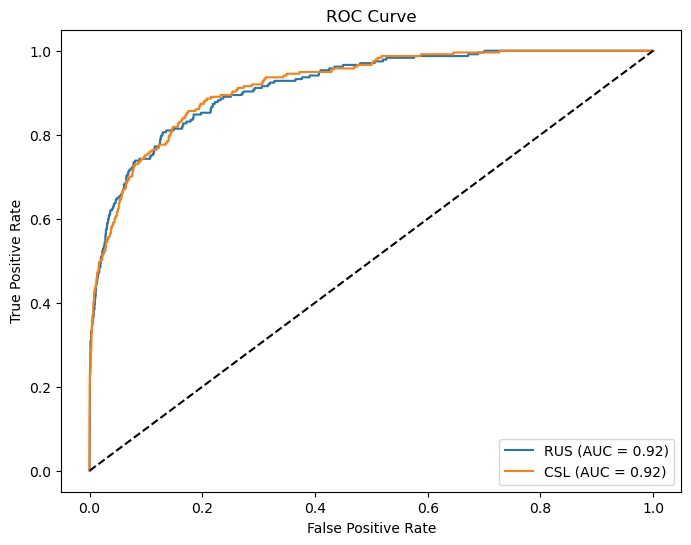

In [11]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 预测概率
y_prob_rus = gbdt_rus.predict_proba(X_test)[:, 1]
y_prob_csl = gbdt_csl.predict_proba(X_test)[:, 1]

# 计算ROC曲线和AUC
fpr_rus, tpr_rus, _ = roc_curve(y_test, y_prob_rus)
fpr_csl, tpr_csl, _ = roc_curve(y_test, y_prob_csl)
auc_rus = auc(fpr_rus, tpr_rus)
auc_csl = auc(fpr_csl, tpr_csl)

# 绘制AUC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_rus, tpr_rus, label=f'RUS (AUC = {auc_rus:.2f})')
plt.plot(fpr_csl, tpr_csl, label=f'CSL (AUC = {auc_csl:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# model-4 XGBoost

In [12]:
from xgboost import XGBClassifier

# 加载数据
file_path = 'E:\\竞赛\\服创赛-A08\\data\\processed_A08-1.csv' 
data = pd.read_csv(file_path)

# 使用0填充NaN值
data.fillna(0, inplace=True)

# 分离特征和目标变量
X = data.drop('RES', axis=1)
y = data['RES']

In [13]:
# 拆分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 使用RandomUnderSampler进行欠采样
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# 使用XGBoost构建模型 - 欠采样数据
xgb_rus = XGBClassifier(random_state=42)
xgb_rus.fit(X_rus, y_rus)

# 使用XGBoost构建模型 - 代价敏感学习
# 在XGBoost中，可以通过设置scale_pos_weight参数来处理不平衡的数据
scale_pos_weight = len(y[y == 0]) / len(y[y == 1])
xgb_csl = XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight)
xgb_csl.fit(X_train, y_train)

# 对测试集进行预测
y_pred_rus = xgb_rus.predict(X_test)
y_pred_csl = xgb_csl.predict(X_test)



In [14]:
# 打印混淆矩阵
print("混淆矩阵 - 欠采样:")
report_rf = classification_report(y_test, y_pred_rus)
print(report_rf )
print(cm_rus)
print("\n混淆矩阵 - 代价敏感学习:")
report_rf_1 = classification_report(y_test, y_pred_csl)
print(report_rf_1)
print(cm_csl)

混淆矩阵 - 欠采样:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      4563
           1       0.22      0.86      0.35       237

    accuracy                           0.84      4800
   macro avg       0.61      0.85      0.63      4800
weighted avg       0.95      0.84      0.88      4800

[[4524   39]
 [ 146   91]]

混淆矩阵 - 代价敏感学习:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4563
           1       0.54      0.47      0.50       237

    accuracy                           0.95      4800
   macro avg       0.76      0.73      0.74      4800
weighted avg       0.95      0.95      0.95      4800

[[4529   34]
 [ 142   95]]


In [15]:

# 获取GBDT和随机森林模型的预测概率
y_pred_probs_gbdt = gbdt_csl.predict_proba(X_test)[:, 1]
y_pred_probs_rf = rf.predict_proba(X_test)[:, 1]

# 计算平均概率
y_pred_probs_avg = (y_pred_probs_gbdt + y_pred_probs_rf) / 2

# 将平均概率转换为最终预测结果（0或1），这里以0.5作为阈值
y_pred_avg = (y_pred_probs_avg >= 0.5).astype(int)

# 评估融合后的模型
accuracy_avg = accuracy_score(y_test, y_pred_avg)
report_avg = classification_report(y_test, y_pred_avg)
cm_avg = confusion_matrix(y_test, y_pred_avg)

# 输出结果
print("分类报告 - 模型融合:\n", report_avg)
print("准确度 - 模型融合:", accuracy_avg)
print("混淆矩阵 - 模型融合:\n", cm_avg)

D:\Anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ValueError: X has 64 features, but RandomForestClassifier is expecting 58 features as input.

# 深度学习
